In [2]:
import numpy as np  # Vectors and matrices
import pandas as pd #Manipulation de données
import matplotlib.pyplot as plt  # Plots
# Enable nice plots
import matplotlib as mpl
try:
    mpl.style.use('seaborn-v0_8')
except:
    mpl.style.use('seaborn')
mpl.rcParams['image.cmap'] = 'plasma'
nice_hist = dict(bins='auto', density=True, ec='w')

import seaborn as sns # Alternative Plots
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler #For normalization 

In [10]:
df_csv = pd.read_csv('goodreads_books_f.csv')

# Renommer la colonne "Premier genre" en "Genres"
df_csv = df_csv.rename(columns={'Premier genre': 'Genres'})
df_csv = df_csv.rename(columns={'Ratings': 'Nombre de lecteurs'})


print(df_csv)

                                 Titre  Année de publication  Pages  \
0    The Invisible Life of Addie LaRue                  2020    448   
1        The House in the Cerulean Sea                  2020    394   
2                    Project Hail Mary                  2021    476   
3                 The Midnight Library                  2020    288   
4                 I'm Glad My Mom Died                  2022    320   
..                                 ...                   ...    ...   
495        Homicidal Psycho Jungle Cat                  1994    176   
496                  One for the Money                  1994    320   
497                          The Beach                  1996    436   
498              We Were the Mulvaneys                  1996    454   
499                         Underworld                  1997    827   

     Nombre de lecteurs  Note moyenne  \
0               1298512          4.18   
1                793548          4.39   
2                745166 

In [11]:
#Nouvelle sauvegarde 
df_csv.to_csv("goodreads_books_f.csv", index=False, encoding="utf-8")

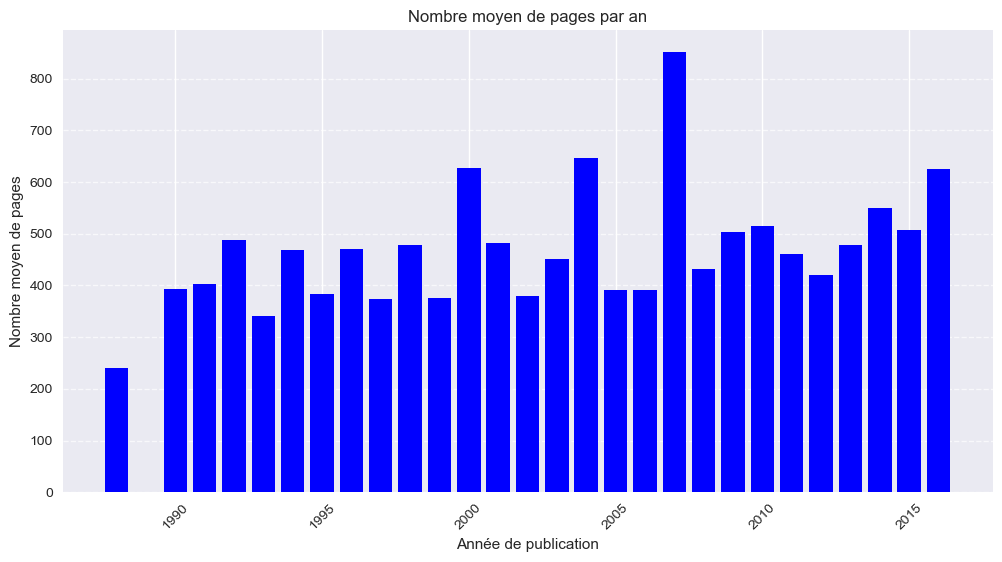

In [5]:
#Diagramme en bâtons pour le nombre moyen de pages par an

# Filtrer les données jusqu'à l'année 2016
df = df_csv[df_csv["Année de publication"] <= 2016]

# Calculer la moyenne du nombre de pages par année
pages_par_an = df.groupby("Année de publication")["Pages"].mean()

# Trier par année croissante
pages_par_an = pages_par_an.sort_index()

# Tracer le diagramme en bâtons
plt.figure(figsize=(12, 6))
plt.bar(pages_par_an.index, pages_par_an.values, color='blue')
plt.xlabel("Année de publication")
plt.ylabel("Nombre moyen de pages")
plt.title("Nombre moyen de pages par an")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

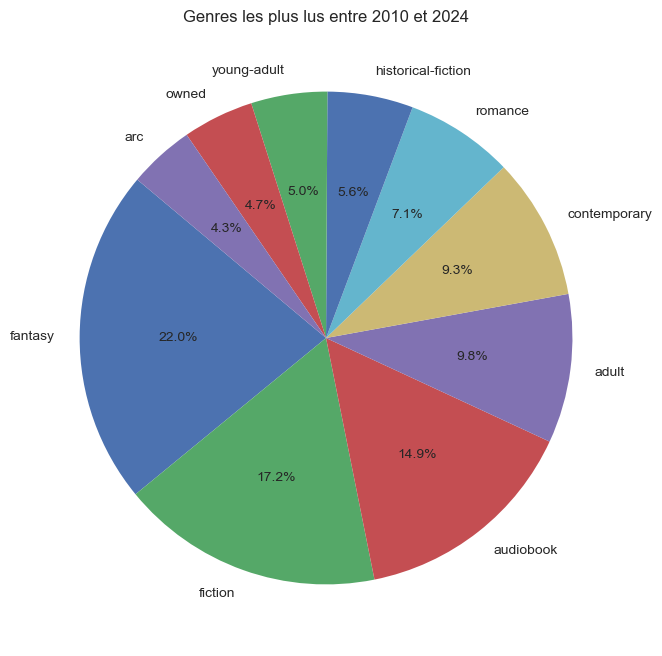

In [13]:
#Pie chart des genres les plus lus entre 2010 et 2024
from collections import Counter

# Filtrer les livres publiés entre 2010 et 2024
df = df_csv[(df_csv['Année de publication'] >= 2010) & (df_csv['Année de publication'] <= 2024)]

# Extraire les genres et les normaliser (tout en minuscules)
genres = []
for genre_list in df['Genres']:
    # Convertir la chaîne de caractères en liste
    genre_list = eval(genre_list)
    # Convertir chaque genre en minuscules pour éviter les doublons
    genres.extend([genre.lower() for genre in genre_list if genre.lower() != "2020" and genre.lower() != "favorites" and genre.lower() != "netgalley"])  # Exclure "2020" et "favorites"

# Compter les occurrences de chaque genre
genre_counts = Counter(genres)

# Convertir en DataFrame pour une manipulation plus facile
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])

# Trier par le nombre d'occurrences
genre_df = genre_df.sort_values(by='Count', ascending=False)

# Afficher les 10 genres les plus populaires
top_genres = genre_df.head(10)

# Créer la pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_genres['Count'], labels=top_genres['Genre'], autopct='%1.1f%%', startangle=140)
plt.title('Genres les plus lus entre 2010 et 2024')
plt.show()

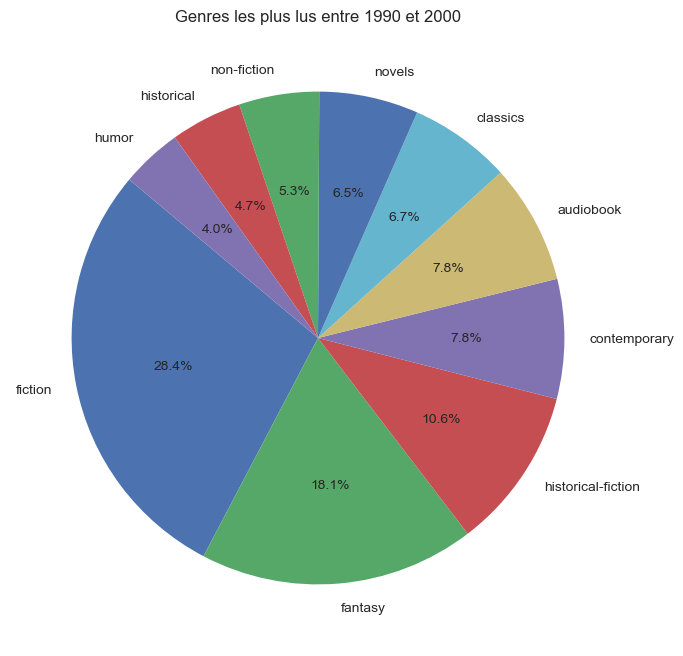

In [14]:
#Pie chart des genres les plus lus entre 1990 et 2000
from collections import Counter

# Filtrer les livres publiés entre 1990 et 2000
df = df_csv[(df_csv['Année de publication'] >= 1990) & (df_csv['Année de publication'] <= 2000)]

# Extraire les genres et les normaliser (tout en minuscules)
genres = []
for genre_list in df['Genres']:
    # Convertir la chaîne de caractères en liste
    genre_list = eval(genre_list)
    # Convertir chaque genre en minuscules pour éviter les doublons
    genres.extend([genre.lower() for genre in genre_list if genre.lower() != "favorites"])

# Compter les occurrences de chaque genre
genre_counts = Counter(genres)

# Convertir en DataFrame pour une manipulation plus facile
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])

# Trier par le nombre d'occurrences
genre_df = genre_df.sort_values(by='Count', ascending=False)

# Afficher les 10 genres les plus populaires
top_genres = genre_df.head(10)

# Créer la pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_genres['Count'], labels=top_genres['Genre'], autopct='%1.1f%%', startangle=140)
plt.title('Genres les plus lus entre 1990 et 2000')
plt.show()